#**Installing dependencies**

In [2]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [12]:
!pip install opencv-python matplotlib

In [15]:
!pip install tensorflow-gpu==2.8.0

In [6]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [4]:
import os

In [5]:
#avoid OOM errors by setting GPU memory consumption frowth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

#**Remove dodgy images**

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
image_exts=['jpeg','jpg','bmp','png']

In [8]:
data_dir='/content/drive/MyDrive/data'

In [9]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#**Load Data**

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
#see the command doc
tf.keras.utils.image_dataset_from_directory??

This function is particularly useful when you have a directory structure with labeled subdirectories, each containing images of a specific class. The function automatically labels the data based on the subdirectory names and creates a dataset that can be fed into a neural network for training.
This utility function is part of the Keras API in TensorFlow.

##**create the tensorflow dataset**

In [14]:
#create a TensorFlow dataset from a directory containing image files.
#create the data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 161 files belonging to 2 classes.


converts the TensorFlow dataset (data) into a Python iterator that yields NumPy arrays. This can be useful if you want to iterate over the dataset and work with the data using standard NumPy operations.

##**allow access to the dataset using an iterator**

In [16]:
#to allow the access to data pipeline
data_iterator = data.as_numpy_iterator()

In [17]:
data_iterator

get the next batch of data from the iterator created from your TensorFlow dataset. This is a common way to iterate over batches of data in a loop.

##**access batches**

In [18]:
#access the data pipleine
batch = data_iterator.next()

In [19]:
#one batch of data
batch

(array([[[[1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
          [1.85250000e+02, 1.85250000e+02, 1.85250000e+02],
          [1.85375000e+02, 1.85375000e+02, 1.85375000e+02],
          ...,
          [1.45000000e+02, 1.45000000e+02, 1.45000000e+02],
          [1.46000000e+02, 1.46000000e+02, 1.46000000e+02],
          [1.46875000e+02, 1.46875000e+02, 1.46875000e+02]],
 
         [[1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
          [1.86750000e+02, 1.86750000e+02, 1.86750000e+02],
          [1.85875000e+02, 1.85875000e+02, 1.85875000e+02],
          ...,
          [1.46750000e+02, 1.46750000e+02, 1.46750000e+02],
          [1.47375000e+02, 1.47375000e+02, 1.47375000e+02],
          [1.46250000e+02, 1.46250000e+02, 1.46250000e+02]],
 
         [[1.82000000e+02, 1.82000000e+02, 1.82000000e+02],
          [1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
          [1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
          ...,
          [1.48250000e+02, 1.48250000e+02, 1.4825

the lenght of the batch which is 2 represents the two parts of the dataset: the images and the labels

In [20]:
len(batch)

2

the first part is the data representation
its actuallt the images from the directory loaded to memory as a set of numpy arrays

In [21]:
batch[0]

array([[[[1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
         [1.85250000e+02, 1.85250000e+02, 1.85250000e+02],
         [1.85375000e+02, 1.85375000e+02, 1.85375000e+02],
         ...,
         [1.45000000e+02, 1.45000000e+02, 1.45000000e+02],
         [1.46000000e+02, 1.46000000e+02, 1.46000000e+02],
         [1.46875000e+02, 1.46875000e+02, 1.46875000e+02]],

        [[1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
         [1.86750000e+02, 1.86750000e+02, 1.86750000e+02],
         [1.85875000e+02, 1.85875000e+02, 1.85875000e+02],
         ...,
         [1.46750000e+02, 1.46750000e+02, 1.46750000e+02],
         [1.47375000e+02, 1.47375000e+02, 1.47375000e+02],
         [1.46250000e+02, 1.46250000e+02, 1.46250000e+02]],

        [[1.82000000e+02, 1.82000000e+02, 1.82000000e+02],
         [1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
         [1.84000000e+02, 1.84000000e+02, 1.84000000e+02],
         ...,
         [1.48250000e+02, 1.48250000e+02, 1.48250000e+02],
         [

batch size of 32 and its the tensorflow default configuration that can be customized

In [22]:
batch[0].shape

(32, 256, 256, 3)

the second has the labels
0 and 1 represent being happy or sad

In [23]:
batch[1]

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

##v**isualize the labels**

now let's see which label represents the first class and which represents the second

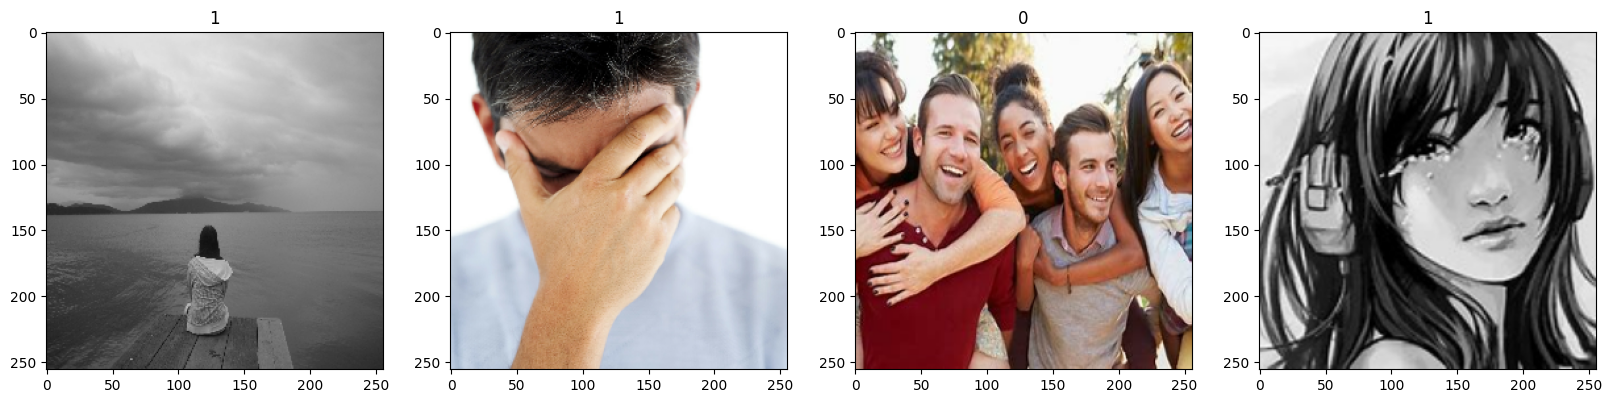

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

so we can see that 1 represents sad and 0 represents happy

now if we want to get another batch of data we can run the next commend again

In [27]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [28]:
batch[1]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

so here we can see that the batch size does not change but the labels change since its a different batch of data

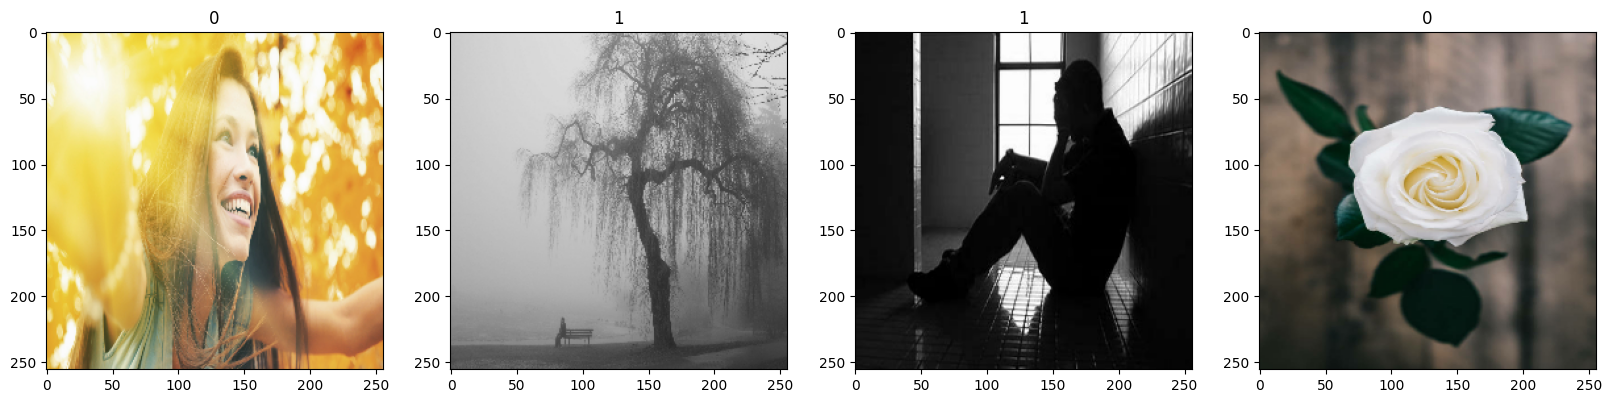

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#**pre-processing**

##**scale data**

the values of our images are between 0 and 255
but whrn building a deep learning model its ideal to work with small values and that would help us uptimize the process

In [30]:
batch[0].min()

0.0

In [31]:
batch[0].max()

255.0

In [32]:
#x represents the images and yy represents the labels
data = data.map(lambda x,y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()[0].max()

1.0

In [39]:
data.as_numpy_iterator().next()[0].min()

0.0

##**split data**

we have 6 batches and every batch has 32 image

In [40]:
len(data)

6

In [59]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)+1
test_size = int(len(data)*.1)+1

In [60]:
train_size

3

In [61]:
val_size

2

In [62]:
test_size

1

In [63]:
train_size+val_size+test_size

6

to split the data we can use the take and skip functions of tensorflow pipeline

In [64]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [65]:
len(train)

3

In [66]:
len(val)

2

In [67]:
len(test)

1

#**deep learning model**

##**build deep learning model**

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [72]:
#create the model
model = Sequential()

In [73]:
#add the layers
#add the first convolution layer
#it has 16 filters
#the filter is 3 pixels by three pixels in size
#its going to have a stride of 1 pixel so it will move by 1px
#the relu function coverts negative values to 0 and the positive remain unchanged
#so its no longer a linear pattern
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#couche qui reduit la dimension spatiale
model.add(MaxPooling2D())
#second convolution block
model.add(Conv2D(32, (3,3), 1, activation='relu'))
#couche qui reduit la dimension spatiale
model.add(MaxPooling2D())
#third convolution block
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#flatten the data
#the number of filters will form the channel value
#Cette couche aplatit la sortie des couches précédentes en un vecteur unidimensionnel.
#C'est nécessaire avant de connecter les couches denses.
model.add(Flatten())
#Une couche dense avec 256 neurones et activation ReLU.
# Cette couche est souvent appelée couche fully connected ou dense.
model.add(Dense(256, activation='relu'))
#output layers
#sigmoid activation converts any output into a range between 0 and 1
# Pour un problème de classification binaire
model.add(Dense(1, activation='sigmoid'))

 ce modèle CNN est conçu pour traiter des images en entrée (256x256 pixels avec 3 canaux) et apprendre à extraire des caractéristiques importantes à travers des couches de convolution, de pooling, et des couches denses, conduisant à une sortie binaire indiquant la classe 'happy' ou 'sad'.







Couche de Convolution (Conv2D):

Rôle : Les couches de convolution apprennent à extraire des caractéristiques importantes des images en utilisant des filtres. Ces filtres sont de petites matrices qui se déplacent sur l'image pour détecter des motifs tels que des bords, des textures, ou des formes.
Paramètres :
Nombre de filtres (16, 32, 16 dans votre modèle) : détermine le nombre de motifs différents que chaque couche peut apprendre.
Taille du noyau ((3,3) dans votre modèle) : spécifie la taille de la fenêtre du filtre.
Activation ('relu') : la fonction d'activation ReLU introduit une non-linéarité en remplaçant les valeurs négatives par zéro.
Couche de Pooling Max (MaxPooling2D):

Rôle : Réduit la dimension spatiale de la représentation, ce qui permet de réduire le nombre de paramètres dans le modèle et de rendre le modèle plus robuste en généralisant mieux.
Paramètres :
Aucun dans votre modèle, par défaut, il utilise généralement une fenêtre de pooling de taille (2,2).
Couche Flatten (Flatten):

Rôle : Aplatit la sortie des couches précédentes en un vecteur unidimensionnel. Nécessaire avant de connecter les couches denses.
Paramètres : Aucun.
Couche Dense (Dense) :

Rôle : Ces couches sont entièrement connectées, ce qui signifie que chaque neurone dans la couche est connecté à chaque neurone de la couche précédente. Ces couches effectuent une transformation linéaire suivie d'une fonction d'activation non linéaire.
Paramètres :
Nombre de neurones (256 dans la première couche dense) : détermine la dimension de la sortie.
Activation ('relu' dans la première couche dense, 'sigmoid' dans la dernière couche dense) : ReLU est couramment utilisé dans les couches cachées pour introduire de la non-linéarité, tandis que la fonction sigmoïde est utilisée dans la dernière couche pour obtenir des probabilités pour un problème de classification binaire.
Pourquoi ce pipeline de couches ?

Ce pipeline est conçu pour apprendre des représentations hiérarchiques des données. Les premières couches de convolution capturent des caractéristiques de bas niveau (bords, textures), tandis que les couches de pooling réduisent la dimensionnalité. Les couches de convolution ultérieures et de pooling capturent des caractéristiques de plus en plus abstraites. La couche dense finale interprète ces caractéristiques pour produire la sortie du modèle.

Pourquoi utiliser une couche de convolution suivie d'une couche de pooling plusieurs fois ?

Cela permet au modèle d'apprendre des caractéristiques de différentes complexités. Les premières couches peuvent apprendre des caractéristiques de bas niveau, tandis que les couches plus profondes peuvent combiner ces caractéristiques pour représenter des motifs plus complexes.

Pourquoi utiliser une couche Dense à la fin avec ReLU puis une autre avec une activation sigmoid ?

La couche Dense avec ReLU est responsable d'apprendre des représentations non linéaires complexes des caractéristiques extraites par les couches précédentes.
La dernière couche Dense avec une activation sigmoid produit une sortie entre 0 et 1, interprétée comme une probabilité. Cela est couramment utilisé dans les problèmes de classification binaire, où la sortie indique la probabilité que l'entrée appartienne à la classe positive.

In [75]:
#compile the model
# la commande model.compile configure le modèle pour l'entraînement en spécifiant l'optimiseur, la fonction de perte et les métriques à utiliser.
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Optimiseur ('adam') :

L'optimiseur est l'algorithme utilisé pour ajuster les poids du réseau afin de minimiser la fonction de perte pendant l'entraînement. "Adam" est un optimiseur populaire qui combine les avantages de l'optimisation par descente de gradient stochastique (SGD) et d'autres techniques d'optimisation.
Fonction de perte (tf.losses.BinaryCrossentropy()) :

La fonction de perte mesure à quel point les prédictions du modèle diffèrent des vraies étiquettes (vérité terrain) pendant l'entraînement. Dans ce cas, BinaryCrossentropy est utilisée, ce qui est adapté aux problèmes de classification binaire. Elle mesure l'entropie croisée entre les probabilités prédites et les étiquettes réelles.
Métriques (metrics=['accuracy']) :

Les métriques sont utilisées pour évaluer la performance du modèle pendant et après l'entraînement. 'accuracy' signifie que la précision (le taux de prédictions correctes) sera utilisée comme métrique.


In [76]:
model.summary()
#we can see that from the first to the second layer the dimension are by half
#and the number of flatten output is 30*30*16 of  max_pooling2d_5 converted to a single dimension

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

##**train**

In [77]:
#point to the log directory
logdir='/content/drive/MyDrive/data/logs'

crée un objet de callback pour TensorBoard dans TensorFlow. TensorBoard est un outil de visualisation puissant qui vous permet de suivre et de visualiser divers aspects de l'entraînement de votre modèle, tels que les courbes d'apprentissage, les distributions des poids, les histogrammes, et plus encore.

In [78]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [79]:
#fit the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 14s 2s/step - loss: 0.9243 - accuracy: 0.5312 - val_loss: 0.8500 - val_accuracy: 0.5312
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.7402 - accuracy: 0.5729 - val_loss: 0.6844 - val_accuracy: 0.5781
Epoch 3/20
3/3 [==============================] - 8s 3s/step - loss: 0.6677 - accuracy: 0.6667 - val_loss: 0.6161 - val_accuracy: 0.6094
Epoch 4/20
3/3 [==============================] - 3s 860ms/step - loss: 0.6324 - accuracy: 0.6250 - val_loss: 0.5687 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 7s 3s/step - loss: 0.5607 - accuracy: 0.7188 - val_loss: 0.4535 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 3s 850ms/step - loss: 0.5388 - accuracy: 0.6771 - val_loss: 0.3914 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 8s 3s/step - loss: 0.4357 - accuracy: 0.8333 - val_loss: 0.3751 - val_accuracy: 0.8594
Epoch 8/20
3/3 [==================

In [80]:
hist

In [81]:
hist.history

{'loss': [0.9242612719535828,
  0.7402291297912598,
  0.6677453517913818,
  0.6324419975280762,
  0.5607374310493469,
  0.5388175845146179,
  0.4357434809207916,
  0.37537050247192383,
  0.4676547348499298,
  0.322142630815506,
  0.3063494861125946,
  0.29594823718070984,
  0.20371897518634796,
  0.2653310298919678,
  0.2942928075790405,
  0.24692384898662567,
  0.3248901069164276,
  0.23175160586833954,
  0.2927513122558594,
  0.21561478078365326],
 'accuracy': [0.53125,
  0.5729166865348816,
  0.6666666865348816,
  0.625,
  0.71875,
  0.6770833134651184,
  0.8333333134651184,
  0.875,
  0.7604166865348816,
  0.8541666865348816,
  0.875,
  0.875,
  0.90625,
  0.875,
  0.8958333134651184,
  0.8854166865348816,
  0.8541666865348816,
  0.875,
  0.8958333134651184,
  0.8958333134651184],
 'val_loss': [0.8500109910964966,
  0.6843655705451965,
  0.6161478757858276,
  0.568692684173584,
  0.4534604549407959,
  0.3913949131965637,
  0.3750617504119873,
  0.40917980670928955,
  0.292978823184

##**plot performance**

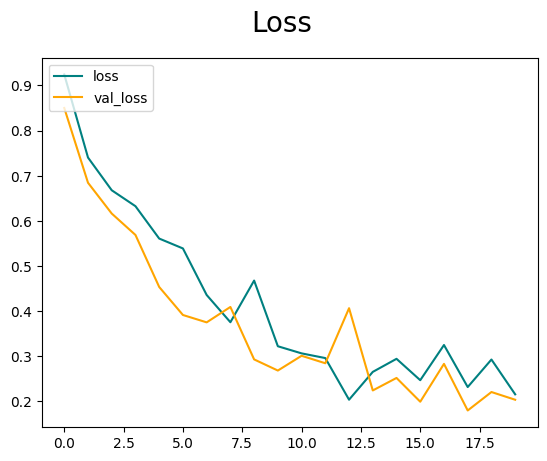

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

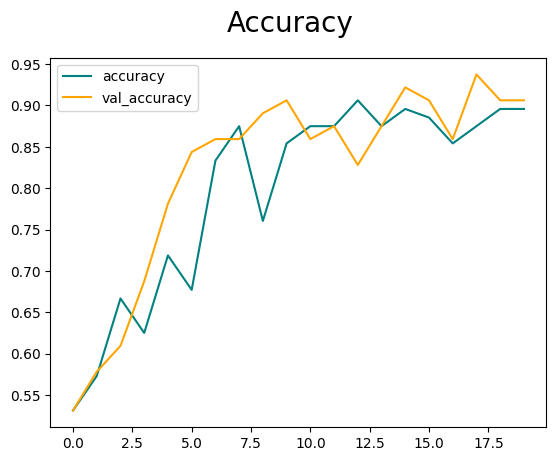

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#**Evaluate performance**

##**evaluate**

In [84]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [86]:
#instancier
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [87]:
len(test)

1

In [88]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [89]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


##**test**

In [90]:
import cv2

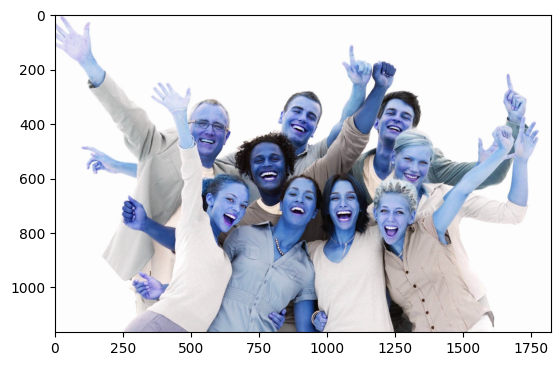

In [106]:
img = cv2.imread('/content/drive/MyDrive/data/happ.jpg')
plt.imshow(img)
plt.show()


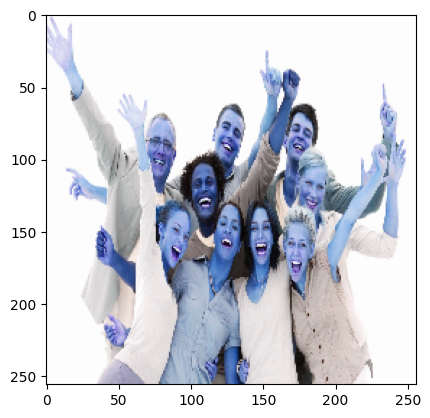

In [107]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [108]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [109]:
yhat

array([[0.12853052]], dtype=float32)

In [110]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


#**save the model**

In [111]:
from tensorflow.keras.models import load_model

In [114]:
model.save(os.path.join('/content/drive/MyDrive/data/models','imageclassifier.h5'))

In [116]:
new_model = load_model(os.path.join('/content/drive/MyDrive/data/models','imageclassifier.h5'))

In [117]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.12853052]], dtype=float32)

In [118]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
